In [1]:
# SVM MODEL

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [2]:
# Classification

Categories=['1','2','3', '4', '5', '6', '7', '8', '9'] 

print("Type y to give categories or type n to go with classification of 1 to 9");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Please give a valid input (y/n)")
if(check=='y'):
  print("Enter How Many types of Images do you want to classify")
  n=int(input())
  Categories=[]
  print(f'please enter {n} names')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"If not in drive Please upload all the {n} category images with the same names as given in categories")



Type y to give categories or type n to go with classification of 1 to 9
n


In [4]:
# Loading Data

flat_data_arr=[]
target_arr=[]
datadir='K:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Digit'
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(100,100,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
df

loading... category : 1
loaded category:1 successfully
loading... category : 2
loaded category:2 successfully
loading... category : 3
loaded category:3 successfully
loading... category : 4
loaded category:4 successfully
loading... category : 5
loaded category:5 successfully
loading... category : 6
loaded category:6 successfully
loading... category : 7
loaded category:7 successfully
loading... category : 8
loaded category:8 successfully
loading... category : 9
loaded category:9 successfully


,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,Target
0,0.039448,0.039448,0.078664,0.028858,0.028858,0.068074,0.035137,0.035137,0.074353,0.042510,...,0.069490,0.143216,0.084165,0.045288,0.156166,0.064789,0.088698,0.235765,0.119609,0
1,0.031845,0.031845,0.071060,0.031142,0.031142,0.070358,0.036314,0.036314,0.075529,0.049658,...,0.060847,0.142580,0.087843,0.041685,0.160318,0.065020,0.076152,0.230985,0.104163,0
2,0.037722,0.037722,0.076938,0.034293,0.034293,0.073509,0.036745,0.036745,0.075961,0.049075,...,0.071051,0.142416,0.097953,0.050847,0.161725,0.080387,0.090115,0.237181,0.127771,0
3,0.038195,0.038195,0.077410,0.030275,0.030275,0.069490,0.033490,0.033490,0.072706,0.043529,...,0.066965,0.147600,0.097741,0.048969,0.162593,0.077005,0.092071,0.239060,0.122905,0
4,0.029802,0.041567,0.076861,0.023760,0.035525,0.070819,0.029184,0.040949,0.076243,0.034678,...,0.069325,0.141482,0.098337,0.045057,0.156946,0.071926,0.091598,0.241412,0.115611,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5400,0.036469,0.032547,0.063920,0.043686,0.038118,0.074431,0.049176,0.041333,0.084471,0.062521,...,0.067929,0.143843,0.090361,0.039729,0.153034,0.062842,0.084381,0.234667,0.107449,8
5401,0.034590,0.030668,0.062041,0.046191,0.042270,0.073642,0.051702,0.047780,0.079153,0.062588,...,0.067929,0.141655,0.087325,0.045597,0.154201,0.062505,0.094971,0.235216,0.111294,8
5402,0.033096,0.033096,0.072312,0.045412,0.045412,0.084627,0.048243,0.048243,0.087459,0.062499,...,0.068941,0.142502,0.090196,0.047013,0.153112,0.070436,0.094971,0.231294,0.125729,8
5403,0.034350,0.034350,0.081409,0.038588,0.038588,0.082353,0.048243,0.048243,0.087459,0.062499,...,0.067929,0.143514,0.082737,0.043641,0.156166,0.063230,0.087754,0.234590,0.117567,8


In [5]:
# Splitted Data

x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [6]:
# Training Data

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}

In [7]:
# import pickle as pkl

# mymodel = pkl.dump("model")


# cap = cv2.VideoCapture(0)

# while True:
#     frame = cap.frame()
#     prediction = model.predict(frame)
#     print(prediction)

In [8]:
# Prediction Data

y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([6, 1, 5, ..., 6, 5, 4])

In [9]:
# Actual Data

print("The actual data is:")
np.array(y_test)

The actual data is:


array([6, 1, 5, ..., 6, 5, 4])

In [10]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 100.0% accurate


In [11]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Digit\9\13.jpg


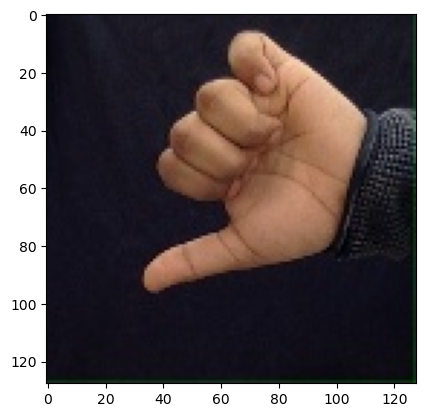

1 = 0.135424830884624%
2 = 0.14657638900509376%
3 = 0.16335471146340183%
4 = 0.29494453536310816%
5 = 0.19345328322113498%
6 = 0.35763406432900774%
7 = 0.16214296333158695%
8 = 0.1190272153700075%
9 = 98.42744200703206%
The predicted image is : 9
Is the image a 9 ?(y/n)
y
Thank you for giving your feedback


In [12]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Digit\6\13.jpg


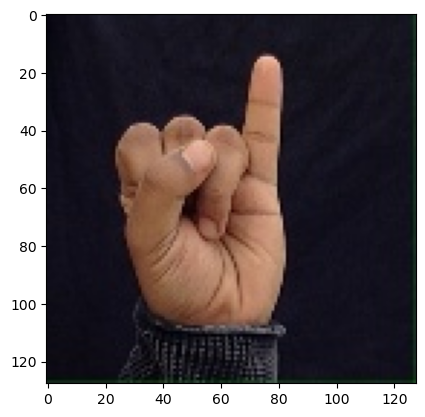

1 = 0.05567842535431269%
2 = 0.08157986350227757%
3 = 0.12069041109751381%
4 = 0.2698688794955819%
5 = 0.0461280784722759%
6 = 99.06369241821903%
7 = 0.22448813363997533%
8 = 0.04457044764600197%
9 = 0.09330334257302468%
The predicted image is : 6
Is the image a 6 ?(y/n)
y
Thank you for giving your feedback


In [13]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Digit\7\35.jpg


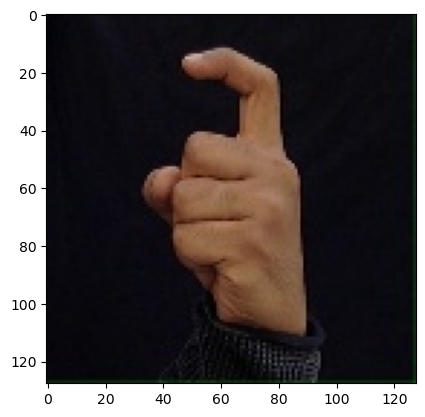

1 = 0.1364632088383214%
2 = 0.1612114896753386%
3 = 0.03249812154118187%
4 = 0.04070606311863606%
5 = 0.02869323710646586%
6 = 0.07033019644055005%
7 = 99.4371789303987%
8 = 0.025264251337817182%
9 = 0.06765450154303482%
The predicted image is : 7
Is the image a 7 ?(y/n)
y
Thank you for giving your feedback


In [14]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Digit\8\24.jpg


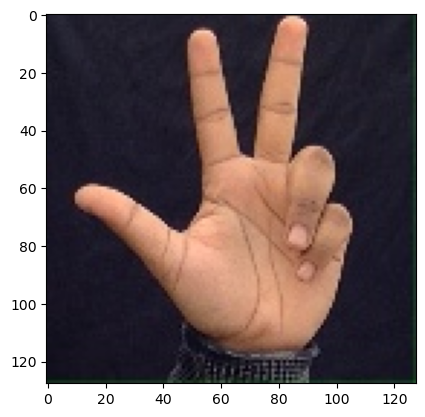

1 = 0.05540845240801776%
2 = 0.046363706916108804%
3 = 0.09707516160807998%
4 = 0.16427096783657652%
5 = 0.25210856852445873%
6 = 0.13183119423799766%
7 = 0.050403156218615706%
8 = 99.08549951011241%
9 = 0.11703928213773099%
The predicted image is : 8
Is the image a 8 ?(y/n)
y
Thank you for giving your feedback


In [15]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Digit\5\25.jpg


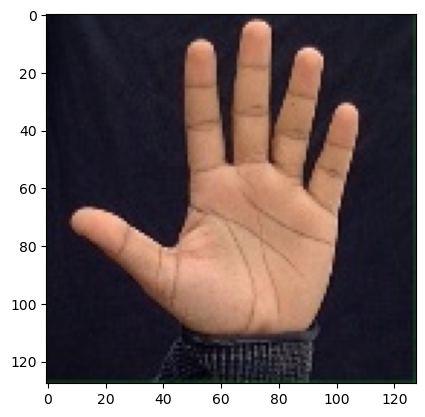

1 = 0.05230213343941405%
2 = 0.05383231723152869%
3 = 0.08671401704552216%
4 = 0.14916025570193006%
5 = 99.00270572324128%
6 = 0.11751319777335807%
7 = 0.055197369729979795%
8 = 0.3111794098811451%
9 = 0.1713955759558383%
The predicted image is : 5
Is the image a 5 ?(y/n)
y
Thank you for giving your feedback


In [16]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Digit\4\0.jpg


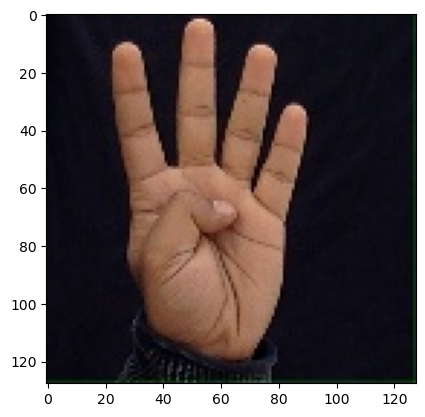

1 = 0.23992643093786206%
2 = 0.520324634477469%
3 = 1.0923490725614382%
4 = 92.72705818804151%
5 = 0.19356513226195454%
6 = 3.918320154150665%
7 = 0.6363092017605568%
8 = 0.13494729612987266%
9 = 0.537199889678679%
The predicted image is : 4
Is the image a 4 ?(y/n)
y
Thank you for giving your feedback


In [17]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Digit\3\3.jpg


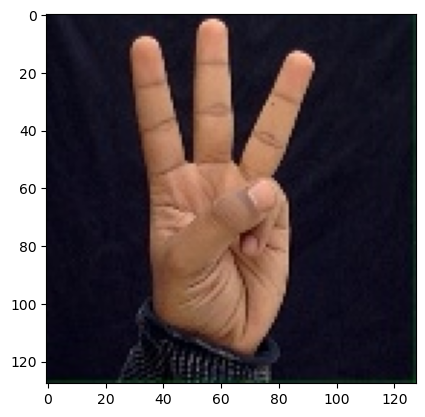

1 = 0.044340515030894326%
2 = 0.0651515398017248%
3 = 99.33083301914652%
4 = 0.2627779030935882%
5 = 0.04390943828689173%
6 = 0.09211922585427045%
7 = 0.04920141691334653%
8 = 0.05217797402745492%
9 = 0.059488967845301735%
The predicted image is : 3
Is the image a 3 ?(y/n)
y
Thank you for giving your feedback


In [18]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Digit\2\12.jpg


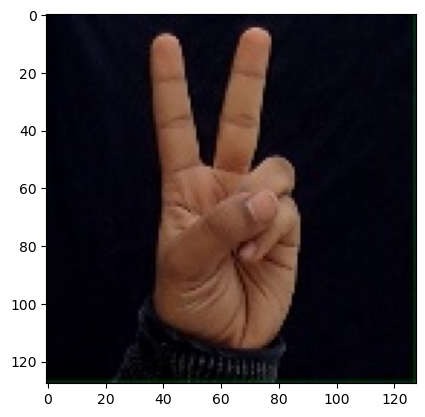

1 = 0.15972971630553282%
2 = 99.35066324323849%
3 = 0.09105643092037145%
4 = 0.06941520665183473%
5 = 0.02823202420075118%
6 = 0.06327586673527781%
7 = 0.1649072749805321%
8 = 0.02606262363141784%
9 = 0.04665761333581002%
The predicted image is : 2
Is the image a 2 ?(y/n)
y
Thank you for giving your feedback


In [20]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for giving your feedback")

Enter URL of ImageK:\Technical Works\Projects\SignBridge-Minor-Project\SVM_Implementation\Dataset_Digit\1\4.jpg


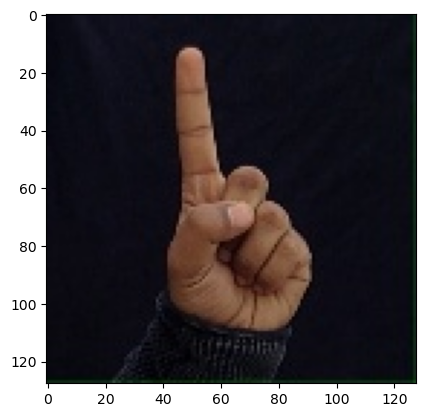

1 = 99.28990005917314%
2 = 0.22521058450224946%
3 = 0.04020263013770118%
4 = 0.049153128351363706%
5 = 0.036575906705501246%
6 = 0.06841302855969739%
7 = 0.18245709823836317%
8 = 0.03445755883659798%
9 = 0.07363000549537227%
The predicted image is : 1
Is the image a 1 ?(y/n)
y
Thank you for giving your feedback


In [21]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)

plt.imshow(img)
plt.show()
img_resize=resize(img,(100,100,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for giving your feedback")

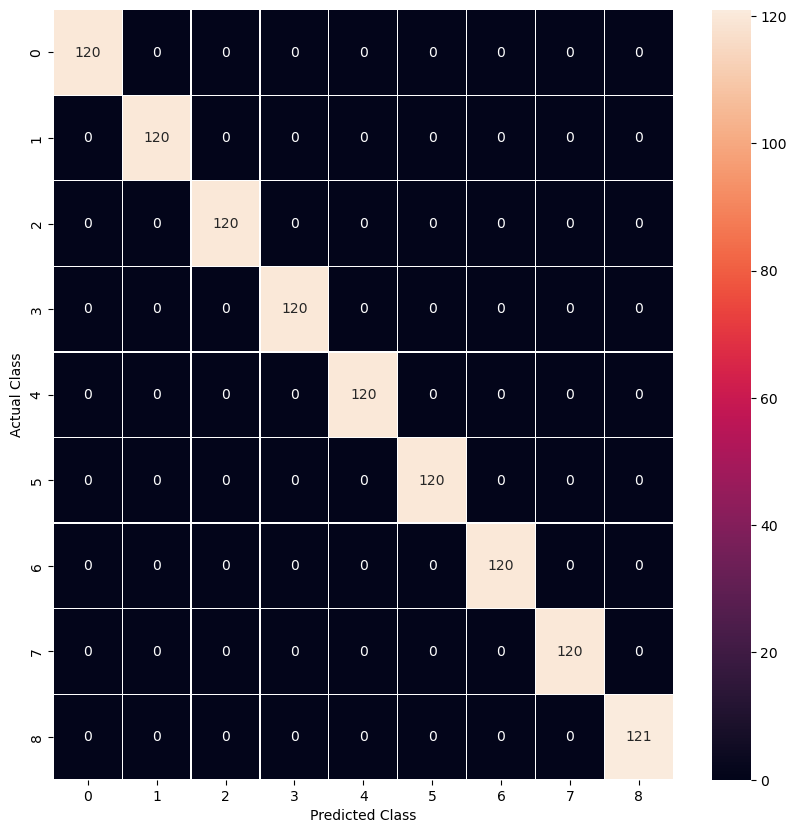

In [22]:
# import libraries
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns            # visualization tool

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, linewidths=.1, fmt= '.0f',ax=ax)     # generating a heat map
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

In [23]:
print(classification_report(y_test,y_pred))  
# y_test: the actual labels
# y_pred: the predicted labels

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       120
           6       1.00      1.00      1.00       120
           7       1.00      1.00      1.00       120
           8       1.00      1.00      1.00       121

    accuracy                           1.00      1081
   macro avg       1.00      1.00      1.00      1081
weighted avg       1.00      1.00      1.00      1081



# Evaluating the model

In [24]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [26]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))


Precision: 1.0
Recall: 1.0
